# Introduction To Data Science – Assignment 1

---

### Sections A – B – C – D

---

***Instructions***

Due Date: Sunday 18th September 2022 – 11:59PM

Name the file in the format Lyyxxxx and save it as .ipynb (e.g. L201234.ipynb)

Submission will be taken on **GitHub and Google Classroom (submit the .ipynb file)** - Instructions to upload onto GitHub are provided in the link https://docs.google.com/document/d/1BR1ULOGeGWJVU6Rr6Qty1FR-quVRZyRvQGII6nEs-wo/edit?usp=sharing

After uploading and submitting the .ipynb file onto Google Classroom, also private comment the link to the GitHub repository.

All source files needed to complete this assignment can be found on the following Google Drive link https://drive.google.com/drive/folders/1VrkaVcExGWqilSeh50WZe4gUBjmUiJ9b?usp=sharing

TA Emails

Section A, C - Muhammad Maarij l192347@lhr.nu.edu.pk

Section B, D - Hira Ijaz l192377@lhr.nu.edu.pk

Happy Coding 😊

---

---
## Question 1
---

Define a procedure called "check_input" that takes an input as a square list of lists (2D Matrix of N x N) and returns a boolen "true" if the input is valid or "false" otherwise, according to the following criteria.

1. Each coloumn must contain numbers from between 1 and N, with no duplicates.
2. Each row must contain numbers from between 1 and N, with no duplicates.

In [18]:
# define procedure here
def check_input(arr):
  n = len(arr)
  temp = []
  
  # checking rows
  for i in range(0,n):
    for j in range(0,n):
      
      if str(arr[i][j]).isalpha():
        return False

      if arr[i][j] > n:
        return False
      
      if arr[i][j] in temp:
        return False

      temp.append(arr[i][j])
    
    temp = []

    # checking coloumns
    for i in range(0,n):
      for j in range(0,n):
        
        if str(arr[i][j]).isalpha():
          return False

        if arr[j][i] > n:
          return False
        
        if arr[j][i] in temp:
          return False

        temp.append(arr[j][i])
      
      temp = []
        
    return True

In [19]:
# run this block to test code after defining the procedure

test1 = [[1, 2, 3],
        [2, 3, 1],
        [3, 1, 2]]

test2 = [[1, 2, 3, 4],
        [2, 3, 1, 3],
        [3, 1, 2, 3],
        [4, 4, 4, 4]]

test3 = [['a', 'b', 'c'],
        ['b', 'c', 'a'],
        ['c', 'a', 'b']]



print(check_input(test1)) # must return true
print(check_input(test2)) # must return false
print(check_input(test3)) # must return false

True
False
False


---
## Question 2
---

**Part A** - Import the file "StudentMarkSheet.csv" as a Pandas DataFrame and print the information for the dataframe

In [20]:
import pandas as pd

data = pd.read_csv("/content/sample_data/StudentMarkSheet.csv")
data.head()

,Student name,Exam name,Exam date,Marks
0,James Walker,Biology,05/06/2016,31.0
1,Velma Clemons,Biology,05/06/2016,43.0
2,Kibo Underwood,Biology,05/06/2016,81.0
3,Louis Mcgee,Biology,05/06/2016,11.0
4,Phyllis Paul,Biology,05/06/2016,18.0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Student name  200 non-null    object 
 1   Exam name     199 non-null    object 
 2   Exam date     200 non-null    object 
 3   Marks         197 non-null    float64
dtypes: float64(1), object(3)
memory usage: 6.4+ KB


**Part B** - Remove any rows that do not contain all the data. Also print the following information.

1. Number of rows before
2. Number of rows containing null data
3. Number of rows after

In [22]:
print("Rows count: ",data.count())     # count is used to print number of rows 

print("\nNull count: \n",data.isna().sum()) # isna return true if there is any null value in data, isna().sum means count the null rows

data = data[data['Exam name'].isna()==False]  # this will not store the row in which exam name is null
data = data[data['Marks'].isna()==False]    # this will not store the row in which marks is null

print("\nRows count:\n ",data.count())

Rows count:  Student name    200
Exam name       199
Exam date       200
Marks           197
dtype: int64

Null count: 
 Student name    0
Exam name       1
Exam date       0
Marks           3
dtype: int64

Rows count:
  Student name    196
Exam name       196
Exam date       196
Marks           196
dtype: int64


**Part C** - Print all the marks along with the subject for the student named "James Walker"

In [23]:
print(data.loc[data['Student name'] == 'James Walker']) # loc worked like an index

     Student name    Exam name   Exam date  Marks
0    James Walker      Biology  05/06/2016   31.0
42   James Walker    Chemistry  15/06/2016   61.0
71   James Walker  Mathematics  29/07/2016   23.0
150  James Walker      Physics  10/06/2016  100.0
180  James Walker    Sociology  21/06/2016   73.0


---
## Question 3
---

**Part A** - From the DataFrame created in Question 2, calculate the average marks for each subject

In [54]:
groupsub = data.groupby('Exam name')  
avg_marks = groupsub['Marks'].mean()  
print(avg_marks)

avg = np.array(avg_marks) 

data2 = pd.DataFrame({'Subject':groupsub.groups.keys(),'Marks':avg})  

Exam name
Biology        47.894737
Chemistry      50.576923
Mathematics    48.972222
Philosophy     47.270270
Physics        51.761905
Sociology      56.026316
Name: Marks, dtype: float64


**Part B** - Using the averages you just calculated, plot a Bar Graph showing the average marks of each subject

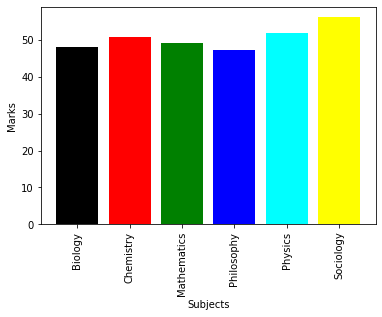

<Figure size 1440x1440 with 0 Axes>

In [72]:
plt.bar(data2['Subject'],data2['Marks'], color=['black', 'red', 'green', 'blue', 'cyan','yellow'])  
plt.xlabel('Subjects')
plt.ylabel('Marks') 
plt.xticks(rotation=90)   
plt.figure(figsize=(20,20)) 
plt.show()

---
## Question 4
---

**Part A** - Import the file "CatData.csv" and preprocess it to remove any null values

In [4]:
data = pd.read_csv('/content/sample_data/CatData.csv')

data.info() # not any null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tail Length (cm)  342 non-null    float64
 1   Mass (kg)         342 non-null    float64
dtypes: float64(2)
memory usage: 5.5 KB


**Part B** - Identify the independant and dependant variables (comment answer below)

In [ ]:
# dependant variable: Tail Length
# independant variable: Mass

**Part C** - Create a linear regression model using sklearn and fit it to the data you just imported


In [8]:
from sklearn import linear_model
import numpy as np

regr = linear_model.LinearRegression()

train_x = np.array(data[['Mass (kg)']])
train_y = np.array(data[['Tail Length (cm)']])

regr.fit(train_x,train_y)

coefficients = regr.coef_
intercept = regr.intercept_


**Part D** - Print the values for slope and y-intercept

In [9]:
print("Slope: ", coefficients)
print("Intercept: ",intercept)

Slope:  [[1.52759156]]
Intercept:  [13.67295593]


**Part E** - Plot a scatter graph of the original data and a regression line on the same figure (example with dummy data shown below)

![](https://drive.google.com/uc?export=view&id=1o_NAsNjfx7zAh9m-UjvWB3rta6uraKdY)

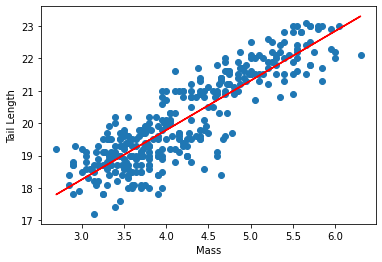

In [12]:
import matplotlib.pyplot as plt

plt.scatter(data['Mass (kg)'],data['Tail Length (cm)'])
plt.plot(data['Mass (kg)'],coefficients[0]*data['Mass (kg)'] + intercept,color="red")
plt.xlabel("Mass")
plt.ylabel("Tail Length")
plt.show()